<a href="https://colab.research.google.com/github/nalgo-intern/team-b/blob/master/%E5%BE%A1%E4%B8%89%E5%AE%B6%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#driveからデータを取得

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp -R /content/drive/My\ Drive/dataset2 /content/
!mkdir learned_data_gosanke

#水増し

In [0]:
#画像の水増し

import os
import glob
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

# 画像を拡張する関数
def draw_images(generator, x, dir_name, index):
    save_name = 'extened-' + str(index)
    g = generator.flow(x, batch_size=1, save_to_dir=output_dir,
                       save_prefix=save_name, save_format='jpg')

    # 1つの入力画像から何枚拡張するかを指定（今回は50枚）
    for i in range(50):
        bach = g.next()

gosanke=["Fushigidane", "Hitokage", "Zenigame",
         "Chikorita", "Hinoarashi", "Waninoko",
         "Kimori", "Achamo", "Mizugoro",
         "Naetoru", "Hikozaru", "Pochama",
         "Tsutaja", "Pokabu", "Mijumaru",
         "Harimaron", "Fokko", "Keromatu",
         "Mokuro", "Nyabii", "Ashimari",
         "Sarunori", "Hibanii", "Messon"]
base_dir = './dataset2/'
for i in gosanke:
    print(i)
    # 出力先ディレクトリの設定
    output_dir = base_dir + i
    
    if not(os.path.exists(output_dir)):
        os.mkdir(output_dir)
    
    # 拡張する画像の読み込み
    images = glob.glob(os.path.join(base_dir + i, "*.jpg"))
    
    # ImageDataGeneratorを定義
    datagen = ImageDataGenerator(rotation_range=30,
                                width_shift_range=20,
                                height_shift_range=0.,
                                zoom_range=0.1,
                                horizontal_flip=True,
                                vertical_flip=True)
    
    # 読み込んだ画像を順に拡張
    for i in range(len(images)):
        img = load_img(images[i])
        img = img.resize((250, 250))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        draw_images(datagen, x, output_dir, i)

Using TensorFlow backend.


Fushigidane
Hitokage
Zenigame
Chikorita
Hinoarashi
Waninoko
Kimori
Achamo
Mizugoro
Naetoru
Hikozaru
Pochama
Tsutaja
Pokabu
Mijumaru
Harimaron
Fokko
Keromatu
Mokuro
Nyabii
Ashimari
Sarunori
Hibanii
Messon


#データセットを作成

In [0]:
!pip install -U numpy

     |████████████████████████████████| 20.4MB 2.8MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


In [0]:
from PIL import Image
import os, glob
import numpy as np
import random, math

root_dir = "./dataset2"
gosanke =["Fushigidane", "Hitokage", "Zenigame",
          "Chikorita", "Hinoarashi", "Waninoko",
          "Kimori", "Achamo", "Mizugoro",
          "Naetoru", "Hikozaru", "Pochama",
          "Tsutaja", "Pokabu", "Mijumaru",
          "Harimaron", "Fokko", "Keromatu",
          "Mokuro", "Nyabii", "Ashimari",
          "Sarunori", "Hibanii", "Messon"]
X = []
Y = []

def make_sample(files):
    global X, Y
    X = []
    Y = []
    for cat, fname in files:
        add_sample(cat, fname)
    return np.array(X), np.array(Y)


def add_sample(cat, fname):
    img = Image.open(fname)
    img = img.convert("RGB")
    img = img.resize((120, 120))
    data = np.asarray(img)
    X.append(data)
    Y.append(cat)

allfiles = []

for idx, cat in enumerate(gosanke):
    image_dir = root_dir + "/" + cat
    files = glob.glob(image_dir + "/*.jpg")
    for f in files:
        allfiles.append((idx, f))

random.shuffle(allfiles)
th = math.floor(len(allfiles) * 0.7)
train = allfiles[0:th]
test = allfiles[th:]
X_train, y_train = make_sample(train)
np.save("./dataset2_X_train.npy", X_train)
np.save("./dataset2_y_train.npy", y_train)
X_test, y_test = make_sample(test)
np.save("./dataset2_X_test.npy", X_test)
np.save("./dataset2_y_test.npy", y_test)

#学習

In [0]:
!pip install numpy==1.16.2

     |████████████████████████████████| 17.3MB 2.9MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.17.1
    Uninstalling numpy-1.17.1:
      Successfully uninstalled numpy-1.17.1


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 57, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 26, 26, 128)       73856     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 11, 11, 128)       147584    
__________

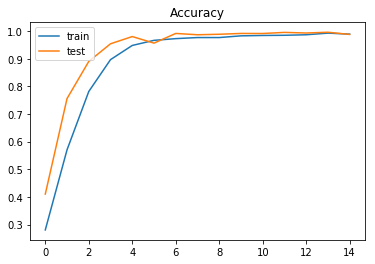

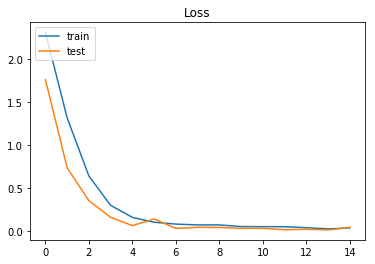

/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:110: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


In [0]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
import numpy as np

num_classes = 24
im_rows = 120
im_cols = 120
in_shape = (im_rows, im_cols, 3)

# データを読み込む --- (*1)
X_train = np.load("./dataset2_X_train.npy")
y_train = np.load("./dataset2_y_train.npy")
X_test = np.load("./dataset2_X_test.npy")
y_test = np.load("./dataset2_y_test.npy")

# データを正規化 --- (*2)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
# ラベルデータをOne-Hot形式に変換
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## モデルを定義 --- (*3)
## 51行目のDenseの値を変えてみたり35-40行目を増やしたり減らしたり、Conv2Dの最初の引数を変えたり、Dropoutの引数を変えたり
#model = Sequential()
#model.add(Conv2D(32, (3, 3), padding='same',
#                 input_shape=in_shape))
#model.add(Activation('relu'))
#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))
#
#model.add(Conv2D(32, (3, 3), padding='same'))
#model.add(Activation('relu'))
#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))
#
##model.add(Conv2D(128, (3, 3), padding='same'))
##model.add(Activation('relu'))
##model.add(Conv2D(128, (3, 3)))
##model.add(Activation('relu'))
##model.add(MaxPooling2D(pool_size=(2, 2)))
##model.add(Dropout(0.25))
#
#model.add(Flatten())
##model.add(Dense(512))
#model.add(Dense(128))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
#model.add(Dense(num_classes))
#model.add(Activation('softmax'))
#
## モデルをコンパイル --- (*4)
#model.compile(
#    loss='categorical_crossentropy',
#    optimizer='adam',
#    metrics=['accuracy'])

#綾鷹
model = Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(120,120,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
#model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256,activation="relu"))
model.add(Dense(num_classes,activation="softmax"))
model.summary()
model.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=["acc"])

# 学習を実行 --- (*5)
#batch_sizeやepochsの数を変えたり
hist = model.fit(X_train, y_train,
    batch_size=128, epochs=15,
    verbose=1,
    validation_data=(X_test, y_test))

# モデルを評価 --- (*6)
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*7)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#モデル・重みの保存
json_string = model.model.to_json()
open('./learned_data_gosanke/data_gosanke.json', 'w').write(json_string)

hdf5_file = "./learned_data_gosanke/data_gosanke.hdf5"
model.model.save_weights(hdf5_file)

#バックアップ

In [0]:
!cp -R ./learned_data_gosanke ./drive/My\ Drive
!cp dataset2*.npy ./drive/My\ Drive

In [0]:
!rm -r dataset2/other